<a href="https://colab.research.google.com/github/arutraj/ML_Basics/blob/main/Reduced_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
import nltk

In [3]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('vader_lexicon')
nltk.download('vader_lexicon')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [5]:
#Read the dataset
df = pd.read_csv('/content/Tweets.csv')
df.head(2)

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)


In [6]:
df.shape

(14640, 15)

In [7]:
#Using the tweets to predict the sentiment
#Only using a subset of the data (5000 samples randomly picked)

indexes = list(range(df.shape[0]))
#Taking 5000 samples at random
l = np.random.choice(indexes,5000)

X = df.loc[l,'text']  #Tweets

Y = df.loc[l,'airline_sentiment'] #The Actual (Target) Sentiments

In [8]:
#Let's generate the BoW representation for the tweets
from nltk import word_tokenize

tokenized_tweets = []
for each in X.str.lower():
    tokenized_tweets.append(nltk.word_tokenize(each))

In [9]:
tokenized_tweets[:2] #First two tokenized tweets

[['@', 'jetblue', 'i', 'cri'],
 ['@',
  'usairways',
  'what',
  "'s",
  'the',
  'deal',
  'with',
  'flight',
  '5268',
  'from',
  'dca',
  'to',
  'phl',
  '?',
  'we',
  'boarded',
  'on',
  'time',
  ',',
  'left',
  'the',
  'gate',
  'a',
  'few',
  'mins',
  'late',
  'flight',
  'and',
  'are',
  'now',
  'sat',
  'on',
  'tarmac',
  '?']]

In [10]:
#Next, we will remove the stopwords

#Let's fetch the English language stopwords
from nltk.corpus import stopwords
sw_list = stopwords.words('english')
print(sw_list)

sw_list.extend(['@',"'",'.','"','/','!',',',"'ve","...","n't",'$',"'s",'''"''',"''",'..','&','*',';','”','``',':','#','!','-','?','%',"'d","'m",'+','++'])

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [11]:
tweets_after_removing_SW = []
for each in tokenized_tweets:
    line = []
    for word in each:
        if word not in sw_list:
            line.append(word)
    tweets_after_removing_SW.append(line)

tweets_after_removing_SW[:2] #First 2 tweets after removal of Stopwords
#print(tweets_after_removing_SW)

[['jetblue', 'cri'],
 ['usairways',
  'deal',
  'flight',
  '5268',
  'dca',
  'phl',
  'boarded',
  'time',
  'left',
  'gate',
  'mins',
  'late',
  'flight',
  'sat',
  'tarmac']]

In [12]:
#Let's do stemming to reduce the number of features!
from nltk.stem import SnowballStemmer
s_stemmer = SnowballStemmer('english')

s_stemmed_list = [] #After Stemming

for each_list in tweets_after_removing_SW:
    line = []
    for word in each_list:
        line.append(s_stemmer.stem(word))
    s_stemmed_list.append(line)
s_stemmed_list[:2]

[['jetblu', 'cri'],
 ['usairway',
  'deal',
  'flight',
  '5268',
  'dca',
  'phl',
  'board',
  'time',
  'left',
  'gate',
  'min',
  'late',
  'flight',
  'sat',
  'tarmac']]

# Using BoW representation

In [13]:
from mlxtend.preprocessing import TransactionEncoder
te = TransactionEncoder()
inp = pd.DataFrame(te.fit(s_stemmed_list).transform(s_stemmed_list).astype(int), columns = te.columns_)
inp.head()

,(,),+-10pm,+restr,+tv,+wifi,--,-/,-17,-17mph,...,😩😩😩,😬,😭,😭😭,😮,😳,🙌🙌,🙏🙏🙏✌️✌️✌️🙏🙏🙏,🙏🙏🙏🙏🙏🙏🙏🙏🙏🙏🙏🙏🙏🙏🙏🙏🙏🙏,🚫
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
inp.shape

(5000, 6549)

In [15]:
len(s_stemmed_list)

5000

In [16]:
for sentence in s_stemmed_list[:20]:
  print(len(sentence))

2
15
11
10
4
17
8
9
9
6
17
11
12
13
9
10
4
7
13
15


In [17]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(inp, Y, test_size = 0.3, random_state = 2)

In [18]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(x_train, y_train)

GaussianNB()

In [19]:
y_hat = model.predict(x_test) #Predictions
y_hat

array(['negative', 'positive', 'neutral', ..., 'neutral', 'negative',
       'negative'], dtype='<U8')

In [20]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_hat)

0.6406666666666667

Accuracy = $\frac{TP + TN}{P + N} = \frac{TP + TN}{TP + TN + FP + FN}$

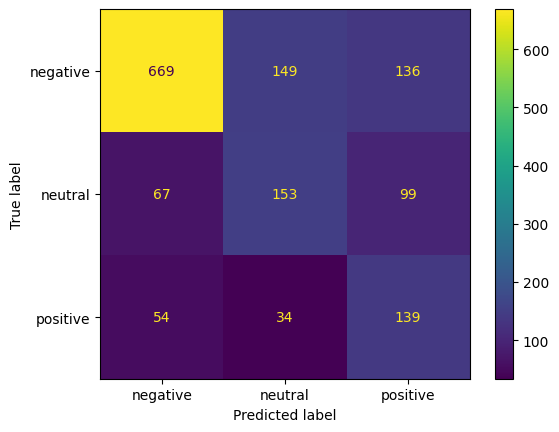

In [21]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
from matplotlib import pyplot as plt
disp = ConfusionMatrixDisplay(confusion_matrix(y_test, y_hat), display_labels=list(np.unique(Y)))
disp.plot()
plt.show()

# Using Term Frequency Matrix

In [22]:
# Convert List of lists to list of Strings
# using map() + join()

str_data = list(map(' '.join, s_stemmed_list))
str_data[:5] # Displaying the top 5 stemmed strings

['jetblu cri',
 'usairway deal flight 5268 dca phl board time left gate min late flight sat tarmac',
 'usairway americanair flight 415 get paperwork input taken hour sittingontheplan hungri',
 'southwestair parent flight frm stl2atl cancel flight 2nite next one',
 'usairway failingyourcustom one one']

In [23]:
s_stemmed_list[0]

['jetblu', 'cri']

'This is the first document.'

'This document is the second document.'

'And this is the third one.'

'Is this the first document?'

['and', 'document', 'first', 'is', 'one', 'second', 'the', 'third', 'this']

[
  
  [0 1 1 1 0 0 1 0 1]

 [0 2 0 1 0 1 1 0 1]

 [1 0 0 1 1 0 1 1 1]

 [0 1 1 1 0 0 1 0 1]

 ]

In [24]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
cv.fit(str_data)
str_df = pd.DataFrame(cv.transform(str_data).todense(), columns = sorted(cv.vocabulary_))
str_df.head()

,00,000,000419,000lbs,00a,00am,00p,00pm,01,0162389030167,...,zip,zkatcher,zo2iceg4li,zofwldqxb,zone,zsdgzydnd,ztrdwv0n4l,zuke,zurich,zv6cfpohl5
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [25]:
x_train, x_test, y_train, y_test = train_test_split(str_df, Y, test_size = 0.3, random_state = 2)

model = GaussianNB()
model.fit(x_train, y_train)

y_hat = model.predict(x_test) #Predictions
accuracy_score(y_test, y_hat)

0.622

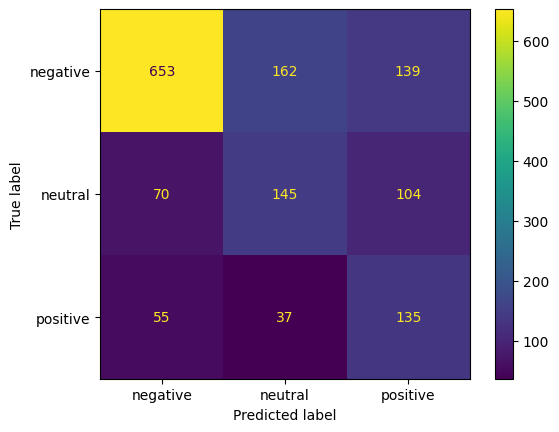

In [26]:
disp = ConfusionMatrixDisplay(confusion_matrix(y_test, y_hat), display_labels=list(np.unique(Y)))
disp.plot()
plt.show()

# Using TF-IDF

In [27]:
from sklearn.feature_extraction.text import TfidfVectorizer
fidf = TfidfVectorizer()
fidf.fit(str_data)
tfidf_df = pd.DataFrame(fidf.transform(str_data).todense(), columns = sorted(fidf.vocabulary_))
tfidf_df.head()

,00,000,000419,000lbs,00a,00am,00p,00pm,01,0162389030167,...,zip,zkatcher,zo2iceg4li,zofwldqxb,zone,zsdgzydnd,ztrdwv0n4l,zuke,zurich,zv6cfpohl5
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [28]:
x_train, x_test, y_train, y_test = train_test_split(tfidf_df, Y, test_size = 0.3, random_state = 2)

model = GaussianNB()
model.fit(x_train, y_train)

y_hat = model.predict(x_test) #Predictions
accuracy_score(y_test, y_hat)

0.618

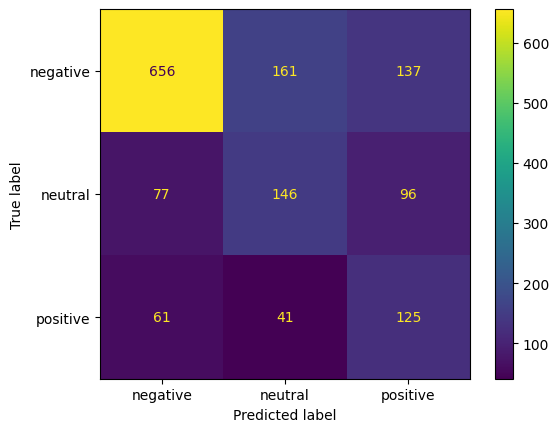

In [29]:
disp = ConfusionMatrixDisplay(confusion_matrix(y_test, y_hat), display_labels=list(np.unique(Y)))
disp.plot()
plt.show()

> To improve these results, you can think of reducing the dimensions of the input data by using appropriate dimensionality reduction techniques (feature selection & feature extraction).

> You can explore Ensemble-based classification models for better baseline results.

> Explore pre-trained models that have been built specifically for sentiment classification.

> Use sentence level embeddings from pretrained models for this supervised task.  

In [ ]:
!pip install pycaret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 486.2/486.2 kB 4.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 11.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 258.0/258.0 kB 21.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.2/302.2 kB 21.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 11.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.7/80.7 kB 13.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 90.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.5/160.5 kB 24.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 16.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 59.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.8/21.8 MB 46.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 6.

In [ ]:
# We recommend using PyCaret for testing multiple classifiers simultaneously.
# !pip install pycaret
import pandas as pd
from pycaret.classification import setup, compare_models

In [30]:
tfidf_df.shape

(5000, 6021)

In [31]:
len(Y.values)

5000

In [32]:
# tfidf_df.drop('target', axis= 1, inplace = True)
tfidf_df['Y'] = Y.values# .reshape(-1,1)

# The setup() function must also be called before executing any other function,
# its two mandatory parameters being “data” and “target”, which will be our main column for operation.

#setting the experiment
experiment = setup(tfidf_df.loc[:500,:], target='Y')
# Choosing a small dataset to demonstrate the usage of PyCaret.
# You can run this on Colab to get the results on the complete dataset.

#show the best model and their statistics
best_model = compare_models()

NameError: name 'setup' is not defined

### More details abot the usage of PyCaret can be found here:
https://analyticsindiamag.com/building-an-ml-classification-model-using-pycaret/

> LazyPredict package is another alternative that you can try for comparing the performance of multiple models simultaneously.

# Using Sentence Embeddings
## Training Doc2Vec

In [33]:
# Do not run ... takes too long.
from gensim.models.doc2vec import Doc2Vec, TaggedDocument

# The input should be passed in sentences (list of strings)
sentences = str_data[:3000] # Using the first 3000 samples to train the model

# Tag the sentences for training
tagged_data = [TaggedDocument(words=sentence.split(), tags=[str(i)]) for i, sentence in enumerate(sentences)]

# Train the model
model = Doc2Vec(tagged_data, vector_size=5, window=2, min_count=3, workers=4, epochs = 500)

In [34]:
# Get the embeddings for the sentences
sentences = str_data
sentence_vectors = [model.infer_vector(sentence.split()) for sentence in sentences]

# The infer_vectors expects the input as a list of words (nltk.word_tokenize())

print("Sentence Embeddings:")
print(np.array(sentence_vectors).shape) #Embeddings of the sentences

Sentence Embeddings:
(5000, 5)


In [35]:
x_train = np.array(sentence_vectors)[:3000,:]
y_train = Y[:3000]

x_test =  np.array(sentence_vectors)[3000:,:]
y_test =  Y[3000:]

model = GaussianNB()
model.fit(x_train, y_train)

y_hat = model.predict(x_test) #Predictions
accuracy_score(y_test, y_hat)

0.6485

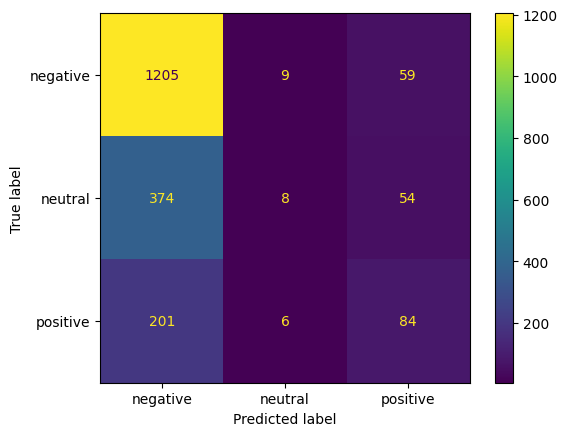

In [36]:
disp = ConfusionMatrixDisplay(confusion_matrix(y_test, y_hat), display_labels=list(np.unique(Y)))
disp.plot()
plt.show()